In [1]:
# Imports
import os
import subprocess
import stat
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
sns.set(style = "dark")


Bad key "text.kerning_factor" on line 4 in
C:\Users\bcpython\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
#Importing dataset
clean_path = "dataset/autos.csv"
df = pd.read_csv(clean_path)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,...,postalCode,lastSeen,yearOfCreation,yearCrawled,monthOfCreation,monthCrawled,NoOfDaysOnline,NoOfHrsOnline,yearsOld,monthsOld
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Offer,480,test,Other,1993,manuell,0,...,70435,2016-04-07 03:16:57,2016,2016,March,March,14,3,23,11
1,2016-03-23 10:58:45,A5_Sportback_2.7_Tdi,privat,Offer,18300,test,coupe,2011,manuell,190,...,66954,2016-04-07 01:46:50,2016,2016,March,March,14,1,5,7
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Offer,9800,test,suv,2004,automatik,163,...,90480,2016-04-04 12:47:46,2016,2016,March,March,22,12,12,4
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Offer,1500,test,kleinwagen,2001,manuell,75,...,91074,2016-03-17 17:40:17,2016,2016,March,March,0,17,15,5
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Offer,3600,test,kleinwagen,2008,manuell,69,...,60437,2016-04-06 10:17:21,2016,2016,March,March,6,10,8,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
313682,2016-03-21 09:50:58,Mitsubishi_Cold,privat,Offer,0,control,Other,2005,manuell,0,...,2694,2016-03-21 10:42:49,2016,2016,March,March,0,10,11,5
313683,2016-03-14 17:48:27,Suche_t4___vito_ab_6_sitze,privat,Offer,2200,test,Other,2005,Unspecified,0,...,39576,2016-04-06 00:46:52,2016,2016,March,March,23,0,11,11
313684,2016-03-05 19:56:21,Smart_smart_leistungssteigerung_100ps,privat,Offer,1199,test,cabrio,2000,automatik,101,...,26135,2016-03-11 18:17:12,2016,2016,March,March,6,18,16,9
313685,2016-03-19 18:57:12,Volkswagen_Multivan_T4_TDI_7DC_UY2,privat,Offer,9200,test,bus,1996,manuell,102,...,87439,2016-04-07 07:15:26,2016,2016,March,March,19,7,20,9


In [127]:
print(df.columns)

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'kilometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'postalCode', 'lastSeen',
       'yearOfCreation', 'yearCrawled', 'monthOfCreation', 'monthCrawled',
       'NoOfDaysOnline', 'NoOfHrsOnline', 'yearsOld', 'monthsOld'],
      dtype='object')


# Distribution of vehicles based on year of register

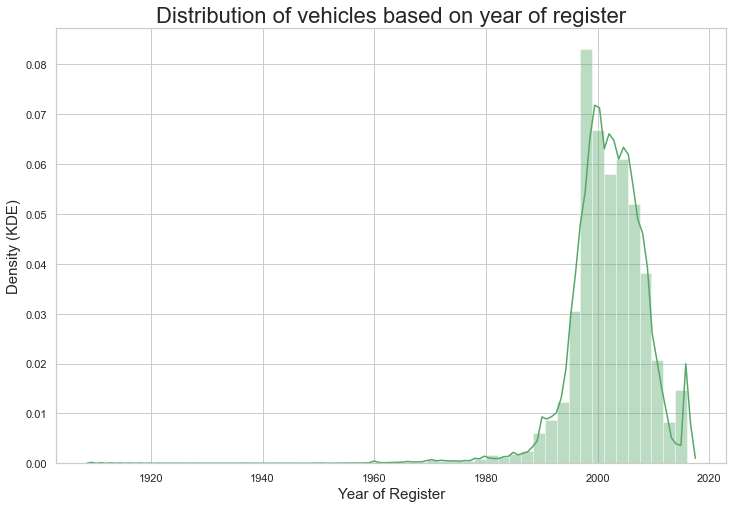

In [158]:
fig, ax = plt.subplots(figsize=(12,8))
sns.set_style('whitegrid')
sns.distplot(df['yearOfRegistration'], color = 'g')
ax.set_title('Distribution of vehicles based on year of register', fontsize = 22)
plt.xlabel(xlabel = 'Year of Register', fontsize = 15)
plt.ylabel(ylabel = 'Density (KDE)', fontsize = 15)
plt.show()
fig.savefig('plots/distribution-of-vehicles-year.png')

# Range of price per vehicle type

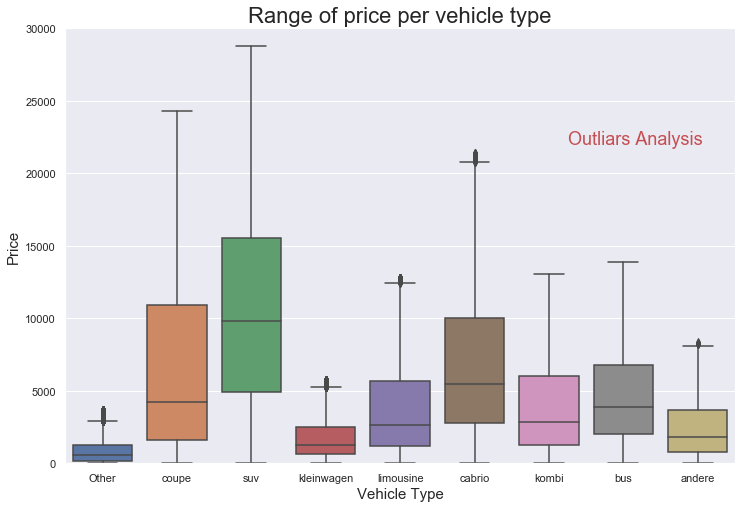

In [160]:
sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(12,8))
sns.boxplot(data = df, x = 'vehicleType', y='price')
plt.xlabel(xlabel = 'Vehicle Type', fontsize = 15)
plt.ylabel(ylabel = 'Price', fontsize = 15)
plt.title('Range of price per vehicle type', fontsize = 22)
plt.text(6.25,22000, 'Outliars Analysis', fontsize = 18, color = 'r')
ax.set_ylim(0,30000)
plt.show
fig.savefig('plots/range-of-price-per-vehicle-type.png')

# Total vehicles per type

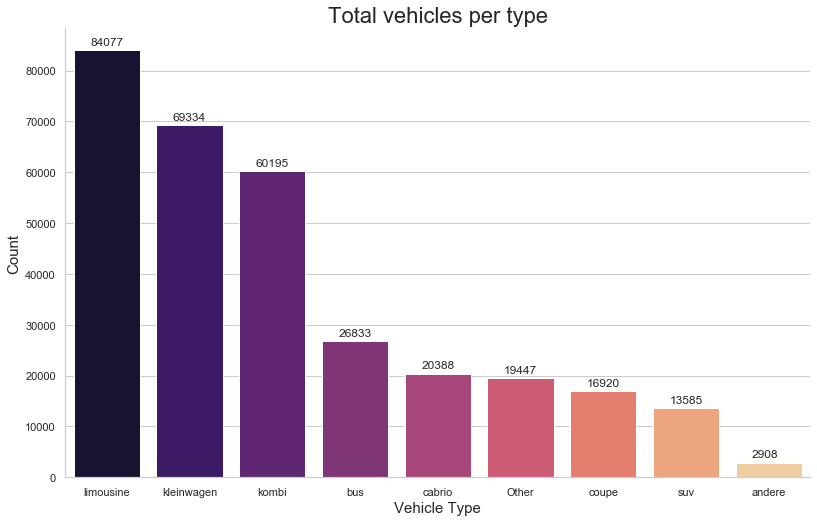

In [196]:
plot_order = df.groupby('vehicleType')['dateCrawled'].count().sort_values(ascending = False).index.values
g = sns.catplot(kind = 'count', x='vehicleType', data = df, palette = "magma", height = 7, aspect = 1.6, order = plot_order)
plt.xlabel(xlabel = 'Vehicle Type', fontsize = 15)
plt.ylabel(ylabel = 'Count', fontsize = 15)
plt.title('Total vehicles per type', fontsize = 22)
for c in g.ax.patches:
    g.ax.annotate((c.get_height()), (c.get_x()+0.2,c.get_height() + 1000), fontsize = 12)
g.savefig('plots/total-vehicles-per-type.png')

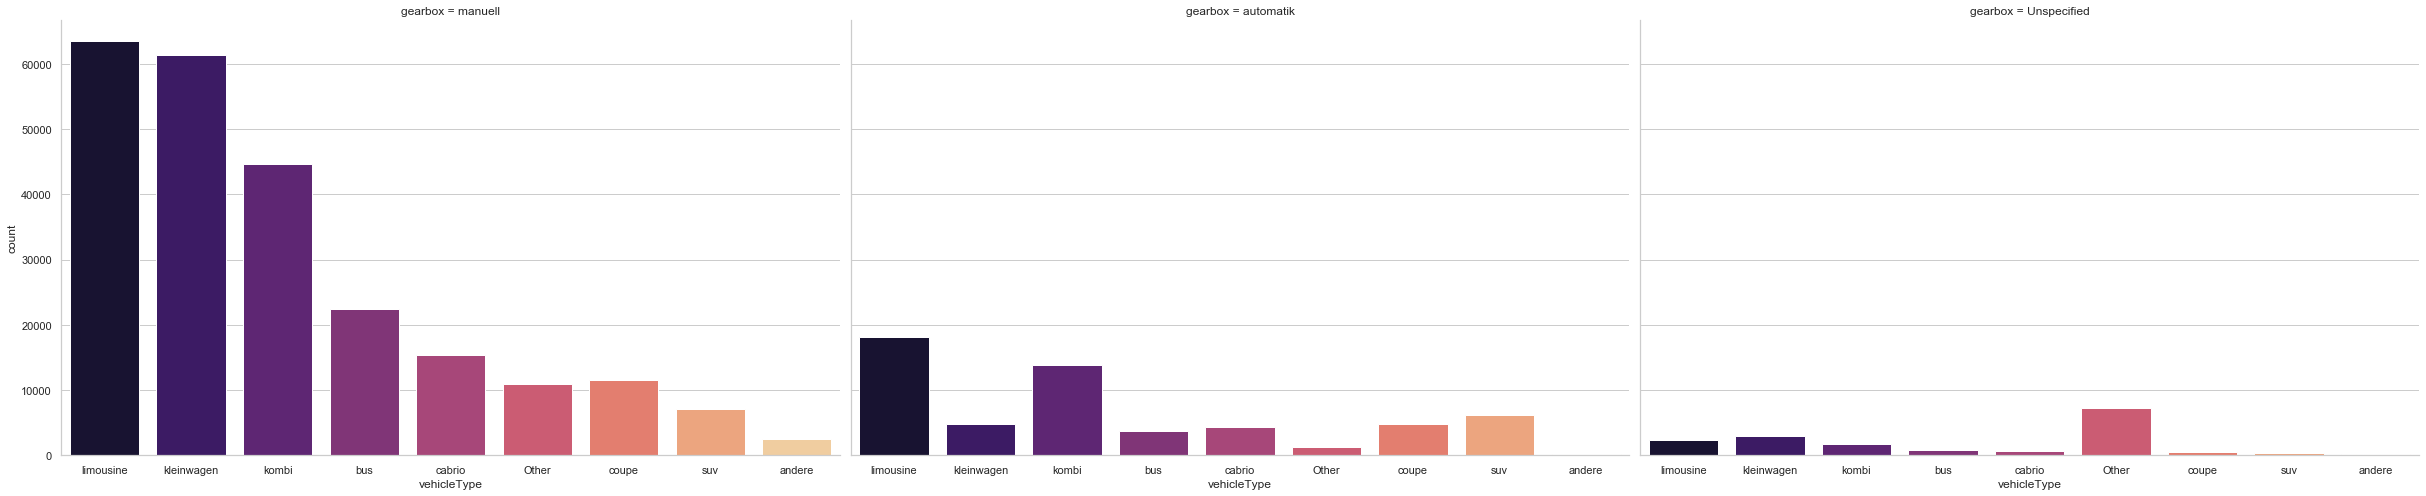

In [197]:
#Just for curiosity, checking the totals per type of gearbox and vehicle.
g2 = sns.catplot(kind = 'count', x='vehicleType', data = df, palette = "magma", height = 7, aspect = 1.6, col = 'gearbox', order = plot_order)
g2.savefig('plots/total-vehicles-per-type-and-gearbox.png')

# Total vehicles per brand

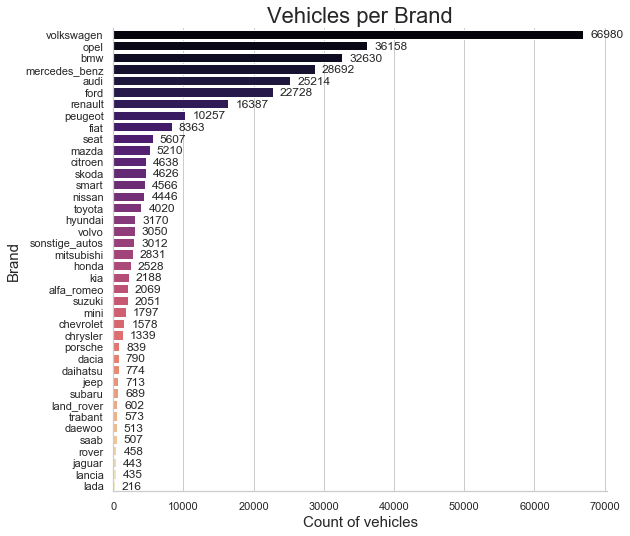

In [185]:
plot_order = df.groupby('brand')['dateCrawled'].count().sort_values(ascending = False).index.values
sns.set_style('whitegrid')
h = sns.catplot(data = df, y = 'brand', kind = 'count', palette = 'magma', height = 7, aspect = 1.25, order = plot_order)
for c in h.ax.patches:
    h.ax.annotate((c.get_width()), (c.get_width()+1000,c.get_y()+.7), fontsize = 12)
plt.xlabel(xlabel = 'Count of vehicles', fontsize = 15)
plt.ylabel(ylabel = 'Brand', fontsize = 15)
plt.title('Vehicles per Brand', fontsize = 22)
h.savefig('plots/vehicles-per-brand.png')

# Average price per vehicle and type of gearbox

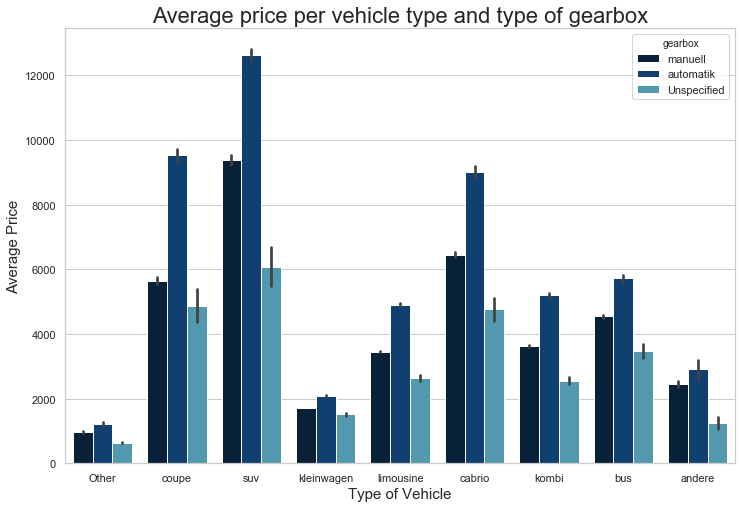

In [232]:
fig,ax = plt.subplots(figsize = (12,8))
g = sns.barplot(data=df, x='vehicleType', y='price', hue = 'gearbox', palette = 'ocean')
plt.xlabel(xlabel = 'Type of Vehicle', fontsize = 15)
plt.ylabel(ylabel = 'Average Price', fontsize = 15)
plt.title('Average price per vehicle type and type of gearbox', fontsize = 22)
fig.savefig('plots/average-price-per-vehicle-type-and-gearbox.png')

# Average price per Fuel Type and Gearbox

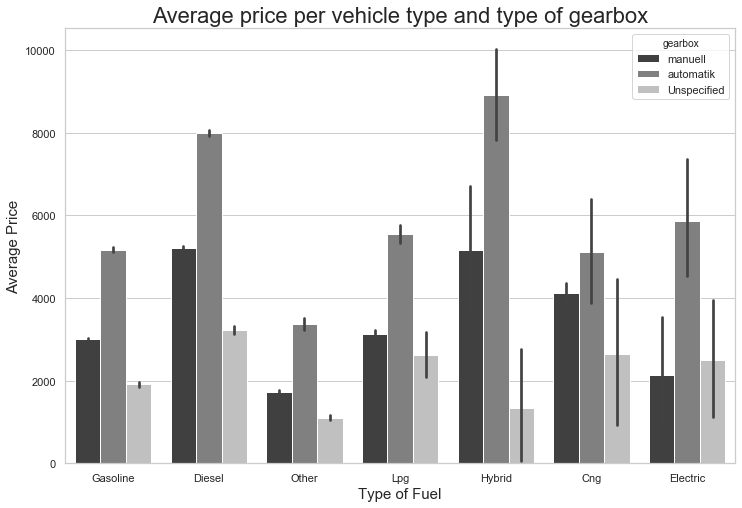

In [231]:
fig,ax = plt.subplots(figsize = (12,8))
g = sns.barplot(data=df, x='fuelType', y='price', hue = 'gearbox', palette = 'gray')
plt.xlabel(xlabel = 'Type of Fuel', fontsize = 15)
plt.ylabel(ylabel = 'Average Price', fontsize = 15)
plt.title('Average price per vehicle type and type of gearbox', fontsize = 22)
fig.savefig('plots/average-price-per-fuel-type-and-gearbox.png')

# Average horsepower per vehicle type and type of gearbox

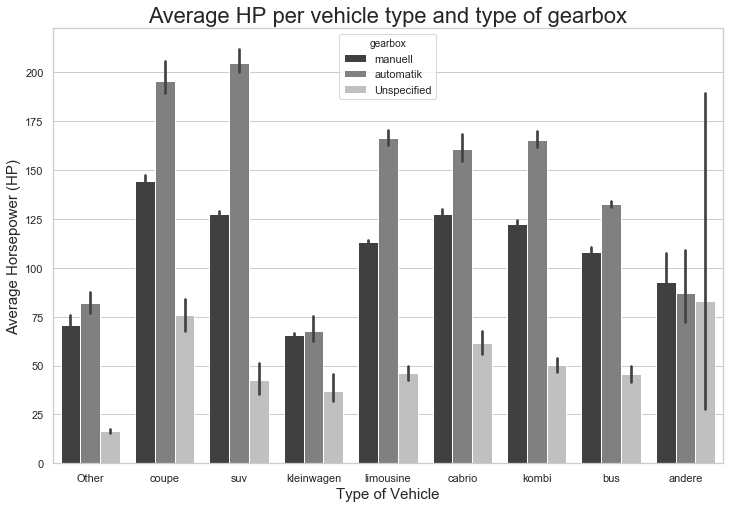

In [241]:
fig,ax = plt.subplots(figsize = (12,8))
g = sns.barplot(data=df, x='vehicleType', y='powerPS', hue = 'gearbox', palette = 'gray')
plt.xlabel(xlabel = 'Type of Vehicle', fontsize = 15)
plt.ylabel(ylabel = 'Average Horsepower (HP)', fontsize = 15)
plt.title('Average HP per vehicle type and type of gearbox', fontsize = 22)
fig.savefig('plots/average-horsepower-per-vehicle-type-and-gearbox.png')

# Average price per brand and vehicle

In [270]:
df_avg = pd.DataFrame()
for brand in list(df['brand'].unique()):
    for vtype in list (df['vehicleType'].unique()):
        price = df[(df["brand"] == brand) & (df['vehicleType'] == vtype)]['price'].mean()
        df_avg = df_avg.append(pd.DataFrame({'brand':brand , "vtype": vtype, "price": price}, index = [0])).reset_index(drop=True)
df_avg['price'].fillna(0, inplace = True)        
df_avg['price'] = df_avg['price'].astype(int)
df_avg

,brand,vtype,price
0,volkswagen,Other,897
1,volkswagen,coupe,8014
2,volkswagen,suv,13946
3,volkswagen,kleinwagen,1626
4,volkswagen,limousine,3743
...,...,...,...
355,lada,limousine,2618
356,lada,cabrio,2500
357,lada,kombi,1278
358,lada,bus,3500


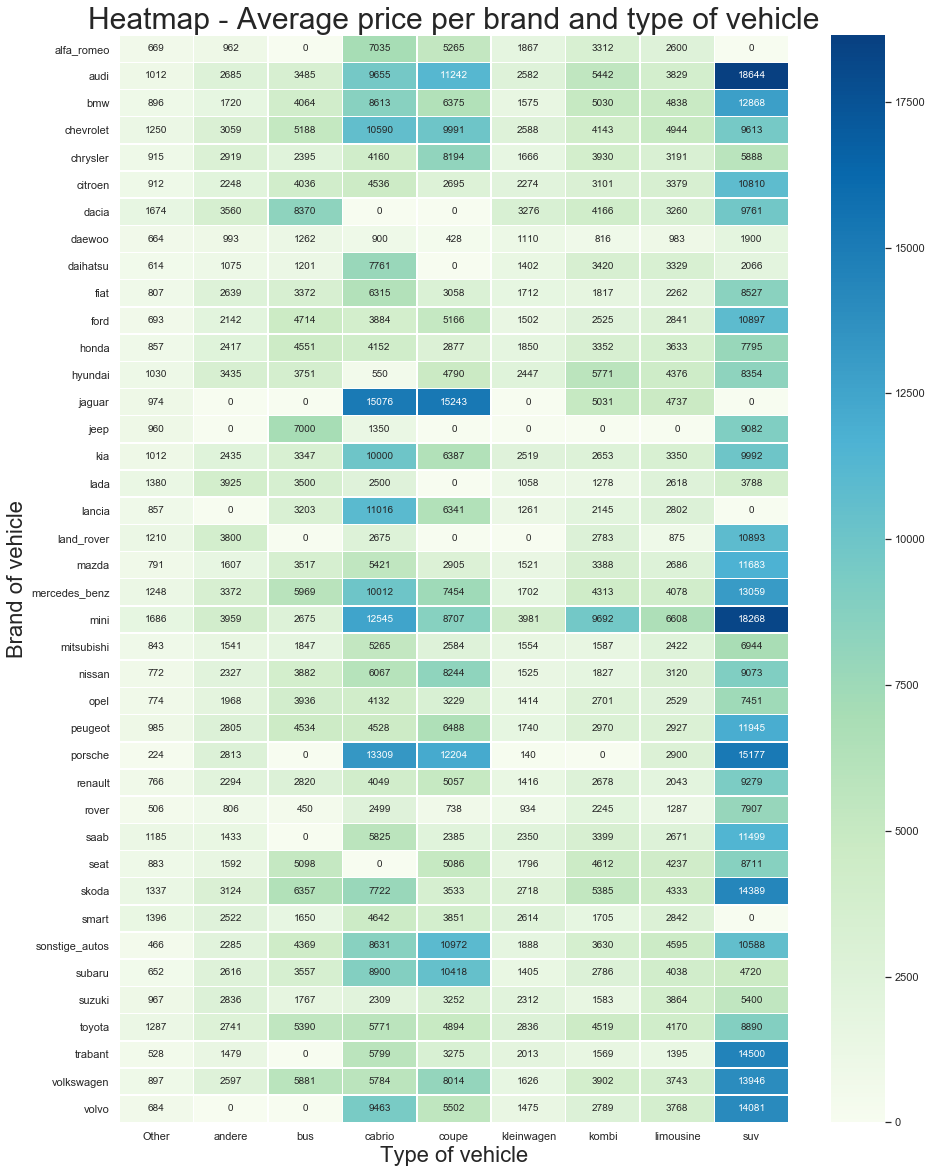

In [308]:
piv = df_avg.pivot('brand','vtype','price')
fig,ax = plt.subplots(figsize = (15,20))
sns.heatmap(piv, annot = True, fmt = 'd',ax = ax, linewidths = 0.5, cmap = 'GnBu')
plt.xlabel(xlabel = 'Type of vehicle', fontsize = 22)
plt.ylabel(ylabel = 'Brand of vehicle', fontsize = 22)
plt.title('Heatmap - Average price per brand and type of vehicle', fontsize = 30)
fig.savefig('plots/heatmap-average-price-per-brand-and-type-of-vehicle.png')